# 1. 双向循环神经网络

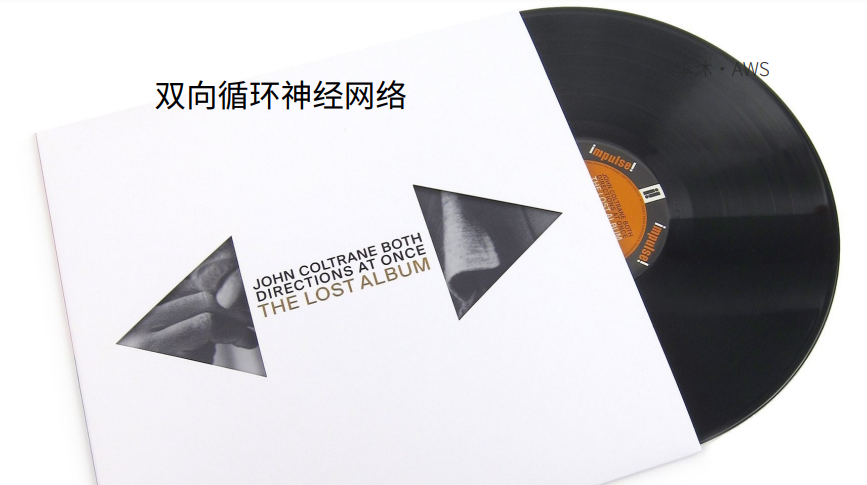

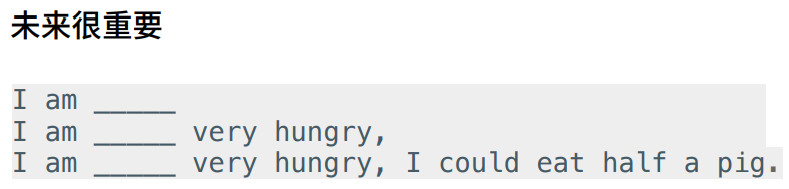

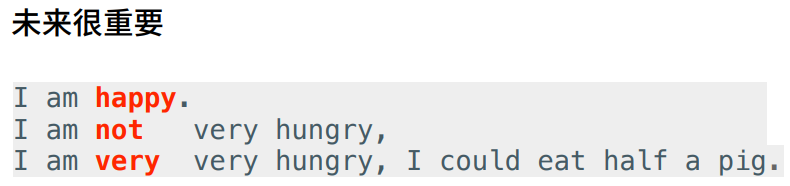

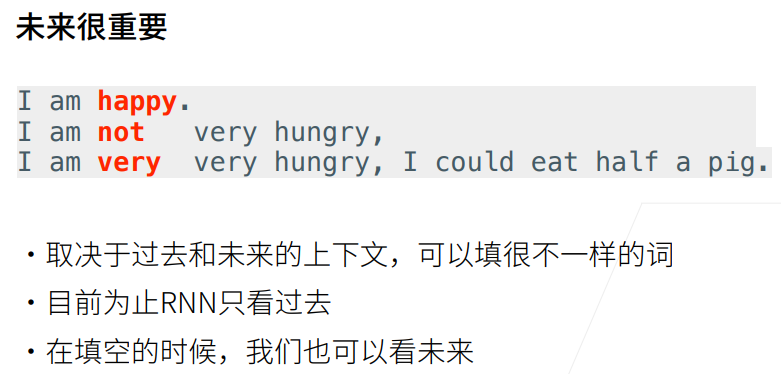

① X2得到反向隐藏状态，X1得到前向隐藏状态，这两个隐藏状态合并(concat)得到O1。

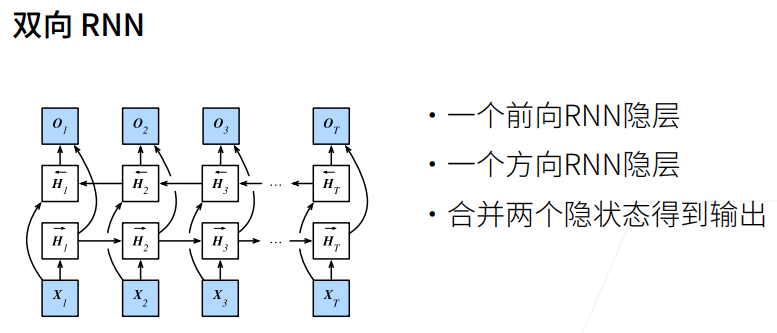

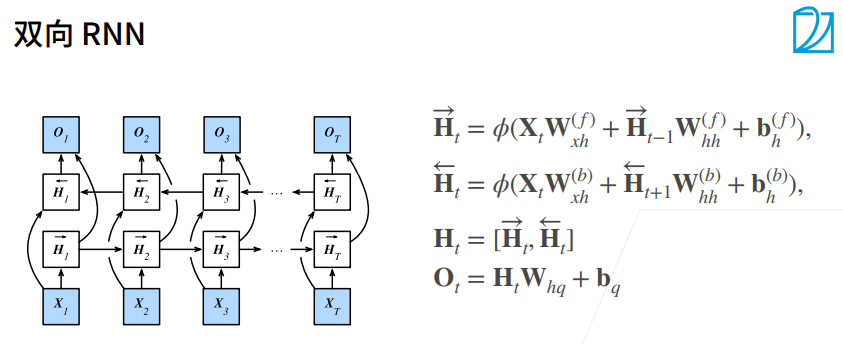

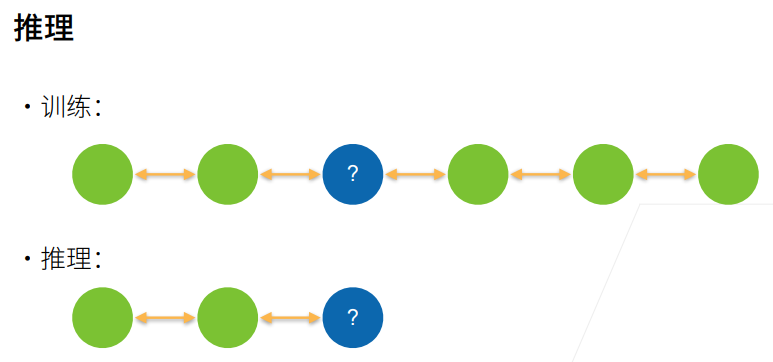

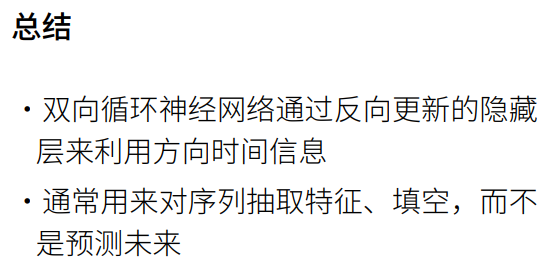

# 2. 双向循环神经网络（的错误应用）
### 因为双向循环神经网络一般不用于推理

perplexity 1.1, 64431.0 tokens/sec on cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


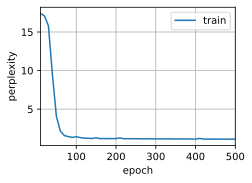

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps, device = 32, 35, d2l.try_gpu()
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size

# 需要再多设置一个bidirectional参数就ok了
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True)  # bidirectional是双向参数
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)  # 双向循环神经网络无法预测未来信息